 ### Explorando o Dataset


In [86]:
import pandas as pd
import numpy as np
import pylab as plt
df = pd.read_csv('titanic.csv')

In [87]:
df.head()

,classe,sobreviveu,nome,sexo,idade,num-irmaos-conjuges,num-pais-filhos,num-bilhete,tarifa,cabine,porto de embarque,salva-vidas,num-corpo,origem-dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Visualizar o tipo dos dados de cada coluna:

In [88]:
df.dtypes

classe                   int64
sobreviveu               int64
nome                    object
sexo                    object
idade                  float64
num-irmaos-conjuges      int64
num-pais-filhos          int64
num-bilhete             object
tarifa                 float64
cabine                  object
porto de embarque       object
salva-vidas             object
num-corpo              float64
origem-dest             object
dtype: object

Para um entendimento mais acertivo sobre o modelo de dados, julgou-se necessário analisar algumas métricas dos dados através de técnicas de análise descritiva. Este procedimento pode ser aplicado apenas à atributos quantitativos pois os mesmos possibilitam operações aritméticas.

As medidas extraídas foram:
* Média
* Desvio padrão
* Mínimo
* Máximo
* Quartis (%) 25 - 50 - 75

In [89]:
df.describe()

,classe,sobreviveu,idade,num-irmaos-conjuges,num-pais-filhos,tarifa,num-corpo
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Através da tabela acima os dados foram analisados com o objetivo de buscar informações interessantes partir das métricas extraídas, a seguir são listadas algumas características interessante sobre os passageiros:

* O atributo num-corpo não extraí nenhuma nova característica com Análise descritiva;
* A média de tarifas (valor pago) foi de 33, porém o desvio padrão está próximo a 51, o que destaca a diferença entre os valores pagos por diferentes passageiros. Segundo a base de dados, o valor mais baixo pago foi de 7.89 enquanto o maior foi de 512.32;
* A idade média dos passageiros era de aproximadamente 29 anos com um desvio padrão próximo a 14 anos. Aqui pode-se evidenciar a uma variação grande de idade em relação a média;
* A média da classe de passageiros foi de 2.29 com um desvio padrão de 0.83, o que também demonstra uma variação grande. A partir dessa informação pode-se dizer que existiam mais passageiros nas classes 1 e 3, que justifica essa média com um desvio padrão alto;
* A média de irmaõs/conjugês é de aproximadamente 0.50 por passageiro, segundo a média. Também deve-se evidenciar que o desvio padrão, para este caso, foi maior que a média;
* A média de passageiros com pais/filhos era de aproximadamente 0.38. O desvio padrão também foi maior que a média;
* Passageiro mais velho: 80 anos;
* Passageiro mais novo: 0.16 (possívelmente um bebê).

Após extrair essas informações é interessante verificar sua integridade, para isso foram identificados valores nulos nas variáveis com o objetivo de encontrar possíveis situações que poderiam interferir nas conclusões acima.

In [90]:
df.isnull().sum()

classe                    0
sobreviveu                0
nome                      0
sexo                      0
idade                   263
num-irmaos-conjuges       0
num-pais-filhos           0
num-bilhete               0
tarifa                    1
cabine                 1014
porto de embarque         2
salva-vidas             823
num-corpo              1188
origem-dest             564
dtype: int64

Dentre as variáveis estudas, podemos verificar que:
* 263 registros estão faltando para o atributo idade. Neste sentido;
* Pode-se verificar que existem 1014 registros faltantes, tornando a variável praticamente inutilizada para qualquer análise;
* Os atributos bote salva-vidas e origem-estino também contém um número alto de dados faltantes.

Agora que temos uma ideia geral do conteúdo do conjunto de dados, pode-se estudar mais a fundo cada coluna. Foi realizada uma análise exploratória de cada coluna, ilustradas abaixo.

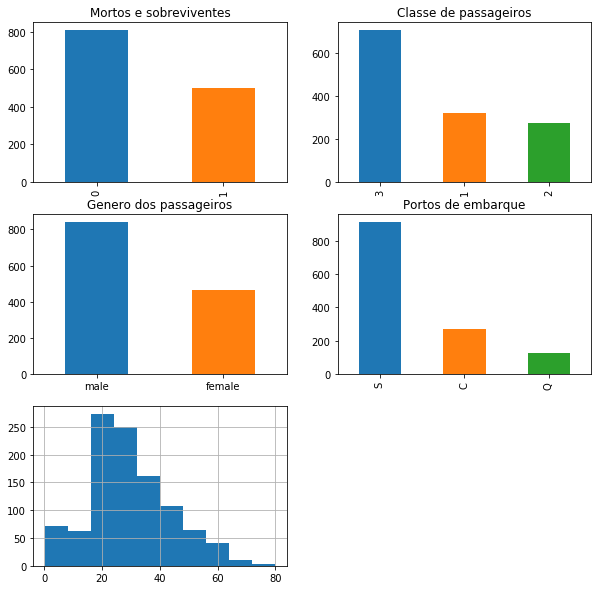

In [91]:
# Configurando grid de gráficos
plt.rc('figure', figsize=(10, 5))
fizsize_with_subplots = (10, 10)
bin_size = 10

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Gráfico que identifica o NNúmero de mortos e sobreviventes
plt.subplot2grid(fig_dims, (0, 0))
df['sobreviveu'].value_counts().plot(kind='bar', 
                                         title='Mortos e sobreviventes')

# Gráfico que identifica a frequência das classes do navio
plt.subplot2grid(fig_dims, (0, 1))
df['classe'].value_counts().plot(kind='bar', 
                                       title='Classe de passageiros')

# Gráfico que identifica o sexo dos passageiros
plt.subplot2grid(fig_dims, (1, 0))
df['sexo'].value_counts().plot(kind='bar',                    
                                    title='Genero dos passageiros')
plt.xticks(rotation=0)

# Gráfico que identifica os portos de embarque
plt.subplot2grid(fig_dims, (1, 1))
df['porto de embarque'].value_counts().plot(kind='bar', 
                                         title='Portos de embarque')

# Gráfico que identifica as idades dos passageiros
plt.subplot2grid(fig_dims, (2, 0))
df['idade'].hist()

Agora é possível realizar o cruzamento dos atributos com o objetivo de extrair mais informações sobre o dataset.

## Sobreviventes por classe
Um primeiro cruzamento foi feito para diagnosticar a proporção de passageiros que sobreviveram com base na classe de passageiros.

In [92]:
classe_sobreviventes  = pd.crosstab(df['classe'], df['sobreviveu'])
classe_sobreviventes

sobreviveu,0,1
classe,,
1,123,200
2,158,119
3,528,181


Pode-se verificar a quantidade de pessoas que morreram (0) e sobreviveram (1) para cada classe. O Gráfico a seguir demonstra isso de forma mais clara.

Text(0,0.5,'Taxa de sobrevivencia')

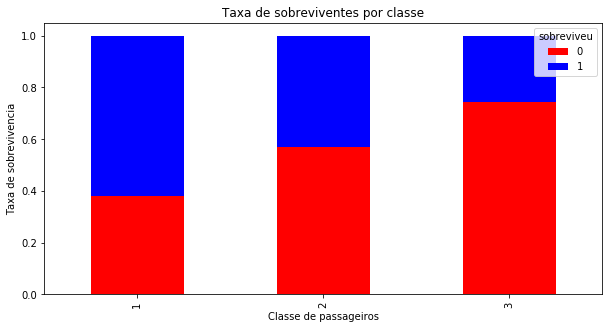

In [93]:
# Normalize the cross tab to sum to 1:
grafico_classe_sobreviventes = classe_sobreviventes.div(classe_sobreviventes.sum(1).astype(float), axis=0)

grafico_classe_sobreviventes.plot(kind='bar', 
                   stacked=True, 
                   title='Taxa de sobreviventes por classe', color=['red', 'blue'])
plt.xlabel('Classe de passageiros')
plt.ylabel('Taxa de sobrevivencia')

Foi possivel verificar que a 1aClasse foi a com maior número de sobreviventes, seguindo da segunda e terceira, respectivamente.

## Sobreviventes por gênero
O atributo sexo também pode ter impactado na sobrevivência ou não de algum passageiro. Tendo isso em vista foi realizado o mesmo procedimento para esta variável.

In [94]:
classe_sobreviventes  = pd.crosstab(df['sexo'], df['sobreviveu'])
classe_sobreviventes

sobreviveu,0,1
sexo,,
female,127,339
male,682,161


** TRANSFORMAÇÃO DE ATRIBUTO: ** Para plotar o gráfico, neste caso, foi necessário realizar uma conversão no tipo do dado, pois o atributo sexo está sendo representado por uma string. Neste sentido deve foi feita uma conversão para um valor númerico que é aceito pela ferramenta de gráficos.

In [95]:
sexo = sorted(df['sexo'].unique())
mapeamento_genero = dict(zip(sexo, range(0, len(sexo) + 1)))
mapeamento_genero

{'female': 0, 'male': 1}

Vamos inserir o atributo convertido como uma nova coluna no conjunto de dados..

In [96]:
df['sexo_numerico'] = df['sexo'].map(mapeamento_genero).astype(int)
df.head()

,classe,sobreviveu,nome,sexo,idade,num-irmaos-conjuges,num-pais-filhos,num-bilhete,tarifa,cabine,porto de embarque,salva-vidas,num-corpo,origem-dest,sexo_numerico
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


Plotando o gráfico...

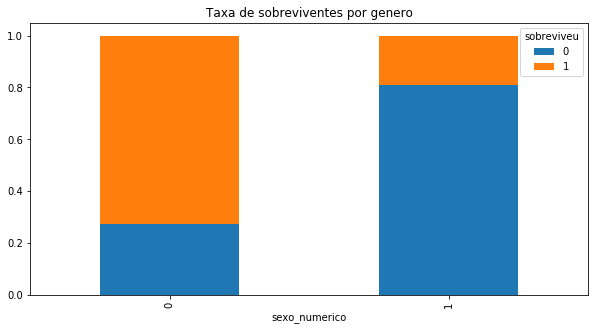

In [97]:
grafico_sexo_sobreviventes = pd.crosstab(df['sexo_numerico'], df['sobreviveu'])
grafico_sexo_sobreviventes = grafico_sexo_sobreviventes.div(grafico_sexo_sobreviventes.sum(1).astype(float), axis=0)
grafico_sexo_sobreviventes.plot(kind='bar', stacked=True, title='Taxa de sobreviventes por genero')

A maioria das mulheres sobreviveram, enquanto a maioria dos homens não.

## Frequência da idade por classe de passageiros.

Analisando a idade..

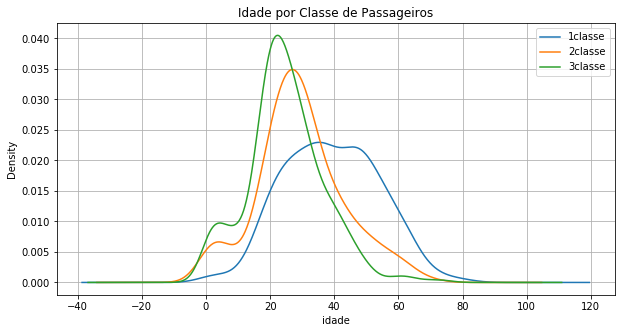

In [98]:
classe_passageiros = sorted(df['classe'].unique())
for pclass in classe_passageiros:
    df.idade[df.classe == pclass].plot(kind='kde', grid=True)
plt.title('Idade por Classe de Passageiros')
plt.xlabel('idade')
plt.legend(('1classe', '2classe', '3classe'), loc='best')



Ao analisar o gráfico, pode-se perceber os passageiros da primeira classe eram geralmente mais velhos do que os passageiros da segunda classe, que por sua vez eram mais velhos do que os passageiros da terceira classe.

## Tamanho da família

INSERÇÃO DE ATRIBUTO: No dataset existem dois atributos relacionados a conjugês/irmãos e pais/filhos. A partir disso podemos criar um atributo "tamanho de família" que será a soma dos existentes.

In [99]:
df['tamanho-familia'] = df['num-irmaos-conjuges'] + df['num-pais-filhos']
df.head()

,classe,sobreviveu,nome,sexo,idade,num-irmaos-conjuges,num-pais-filhos,num-bilhete,tarifa,cabine,porto de embarque,salva-vidas,num-corpo,origem-dest,sexo_numerico,tamanho-familia
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3


Plotando um gráfico para visualizar o novo atributo..

Text(0.5,1,'Familiares por passageiros')

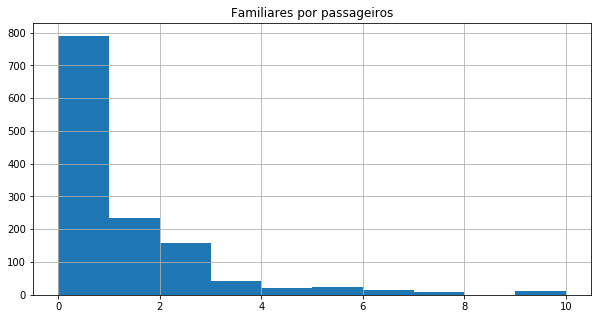

In [100]:
df['tamanho-familia'].hist()
plt.title('Familiares por passageiros')

Text(0.5,1,'Survivors by Family Size')

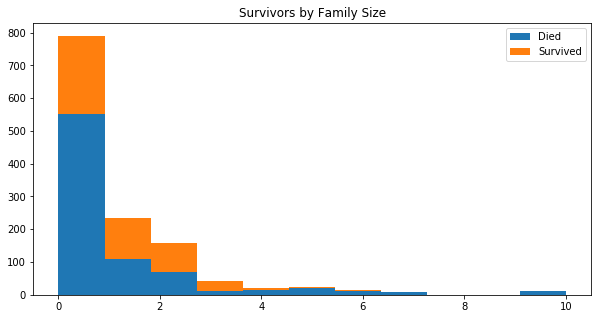

In [101]:
# Get the unique values of Embarked and its maximum
tamanho_familia = sorted(df['tamanho-familia'].unique())
tamanho_familia = max(tamanho_familia)

df1 = df[df['sobreviveu'] == 0]['tamanho-familia']
df2 = df[df['sobreviveu'] == 1]['tamanho-familia']
plt.hist([df1, df2], 
         bins=tamanho_familia + 1, 
         range=(0, tamanho_familia), 
         stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')

Analisando o gráfico que relaciona o tamanho da família com a sobrevivência do passageiro pode-se evidenciar que não há nehum padrão ou característica peculiar à ser destacada. 